# Batch Gradient Descent With a Single Neuron

*Tue Sep 14, Week 3, Lecture 5*

## Why Python and why Jupyter Notebooks?

- Python is not an ideal langauge for this
- Jupyter is not an ideal environment for htis
- They are, however, in my opinion the **best** we have 

## Notes

- In this example, I am not going to do fancy imports
- I want you to see the layout of torch and torchvision

In [1]:
import torch
import torchvision
import pandas as pd

In [2]:
torch.rand(5)

tensor([0.4047, 0.5832, 0.5210, 0.8766, 0.5870])

In [3]:
torch.rand(5).shape

torch.Size([5])

In [4]:
torch.rand(5, 25)

tensor([[0.0176, 0.2137, 0.2934, 0.0021, 0.0355, 0.8509, 0.2854, 0.5718, 0.9821,
         0.0989, 0.4681, 0.4949, 0.8935, 0.8709, 0.1178, 0.4783, 0.3256, 0.8576,
         0.8334, 0.0944, 0.1247, 0.4660, 0.3827, 0.3609, 0.7815],
        [0.1031, 0.3207, 0.2426, 0.7922, 0.1998, 0.4734, 0.9901, 0.0387, 0.0565,
         0.8475, 0.2266, 0.9688, 0.2311, 0.5029, 0.4896, 0.0680, 0.4762, 0.9621,
         0.1295, 0.5601, 0.5696, 0.6030, 0.2671, 0.6977, 0.9014],
        [0.4873, 0.6831, 0.2166, 0.0951, 0.0713, 0.9445, 0.8816, 0.9272, 0.1644,
         0.0646, 0.1478, 0.8630, 0.8663, 0.7600, 0.6990, 0.2086, 0.4726, 0.6437,
         0.0850, 0.6711, 0.3615, 0.7721, 0.1759, 0.1711, 0.3957],
        [0.9461, 0.0695, 0.0104, 0.0496, 0.9100, 0.1168, 0.7036, 0.1321, 0.2819,
         0.6058, 0.7580, 0.6522, 0.9152, 0.2864, 0.2455, 0.1639, 0.5676, 0.3665,
         0.6507, 0.1444, 0.8936, 0.6456, 0.2600, 0.0348, 0.7765],
        [0.6998, 0.5347, 0.9705, 0.2132, 0.8254, 0.2598, 0.2162, 0.1155, 0.3259,
       

In [5]:
torch.rand(5, 25).shape

torch.Size([5, 25])

In [6]:
X = torch.rand(5, 12)
Y = torch.rand(12, 16)

In [7]:
X.shape, Y.shape

(torch.Size([5, 12]), torch.Size([12, 16]))

In [8]:
X

tensor([[0.3864, 0.7037, 0.6821, 0.8048, 0.9671, 0.4664, 0.9022, 0.2205, 0.0137,
         0.8965, 0.8443, 0.8867],
        [0.9841, 0.1896, 0.2573, 0.4422, 0.8953, 0.2152, 0.2101, 0.9752, 0.4910,
         0.8483, 0.5903, 0.5164],
        [0.0451, 0.0018, 0.1657, 0.6469, 0.1134, 0.6202, 0.1343, 0.1981, 0.6585,
         0.4996, 0.2715, 0.1948],
        [0.3621, 0.5102, 0.4404, 0.2930, 0.7442, 0.4171, 0.7039, 0.6040, 0.1637,
         0.2619, 0.7541, 0.4196],
        [0.4286, 0.9683, 0.5423, 0.5075, 0.4030, 0.1407, 0.3494, 0.6268, 0.2796,
         0.0026, 0.3767, 0.1478]])

In [9]:
X @ Y

tensor([[4.8177, 4.0927, 3.5282, 2.8619, 4.1369, 3.7936, 4.2357, 4.3927, 4.5775,
         3.2928, 2.8309, 2.4069, 5.0365, 2.8640, 3.6741, 4.8387],
        [3.7679, 3.3960, 2.7463, 2.6542, 3.6367, 3.1320, 4.1867, 3.6364, 3.9430,
         2.4535, 2.8579, 2.2748, 3.9684, 3.2285, 2.9724, 4.4602],
        [2.0395, 2.1602, 2.0952, 1.4734, 1.6864, 1.7223, 2.3536, 2.2544, 2.3299,
         0.9646, 1.0978, 1.1920, 2.1662, 1.6043, 1.7248, 2.4073],
        [3.4578, 2.7052, 2.4335, 2.1426, 2.9036, 2.6545, 3.3762, 3.1296, 3.3312,
         2.5069, 2.3897, 2.0356, 3.5558, 2.0782, 2.6803, 3.3963],
        [2.7477, 2.6022, 2.1568, 1.7811, 2.4968, 1.9652, 2.8926, 2.4896, 2.8919,
         2.3041, 2.4481, 1.8166, 3.0692, 1.6359, 1.9873, 2.9443]])

In [10]:
Z = X @ Y

In [11]:
X.shape, Y.shape

(torch.Size([5, 12]), torch.Size([12, 16]))

In [12]:
Z.shape

torch.Size([5, 16])

In [13]:
Y @ Z

RuntimeError: mat1 and mat2 shapes cannot be multiplied (12x16 and 5x16)

In [14]:
# MNIST : hello world
# EMNIST : extended with letters in addition to digits
# KMNIST : Kuzushiji, Japanese characters
# QMNIST : newer MNIST with better source information

data_path = "../data/"

mnist_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_dataset = torchvision.datasets.MNIST(
    root=data_path, train=True, download=True, transform=mnist_transforms
)

/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-pma2oi4d/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [15]:
# batch_size, shuffle
train_loader = torch.utils.data.DataLoader(train_dataset)

In [16]:
image, label = next(iter(train_loader))

In [17]:
image.shape

torch.Size([1, 1, 28, 28])

In [18]:
label.shape, label

(torch.Size([1]), tensor([5]))

In [19]:
image

tensor([[[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

In [20]:
mnist_avg, mnist_std = 0.130, 0.3081

image = torch.as_tensor((image * mnist_std + mnist_avg) * 255, dtype=torch.uint8)
image

tensor([[[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  17,
            17,  17, 125, 135, 174,  25, 165, 254, 246, 126,   0,   0,   0,   0],
          [  0,   0,  

In [21]:
image_df = pd.DataFrame(image.squeeze().numpy())
image_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,174,25,165,254,246,126,0,0,0,0
6,0,0,0,0,0,0,0,0,29,35,...,224,171,252,241,194,63,0,0,0,0
7,0,0,0,0,0,0,0,48,237,252,...,92,81,81,55,38,0,0,0,0,0
8,0,0,0,0,0,0,0,17,218,252,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,79,155,...,0,0,0,0,0,0,0,0,0,0


In [22]:
image_df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,2,17,17,17,125,135,174,25,165,254,246,126,0,0,0,0
6,0,0,0,0,0,0,0,0,29,35,93,153,169,252,252,252,252,252,224,171,252,241,194,63,0,0,0,0
7,0,0,0,0,0,0,0,48,237,252,252,252,252,252,252,252,252,250,92,81,81,55,38,0,0,0,0,0
8,0,0,0,0,0,0,0,17,218,252,252,252,252,252,197,181,246,240,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,79,155,106,252,252,204,10,0,42,153,0,0,0,0,0,0,0,0,0,0


In [23]:
import matplotlib.pyplot as plt

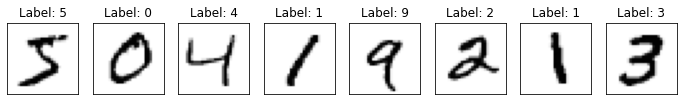

In [24]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [25]:
# Simple single neuron model; sometimes called logistic regression

num_pixels = 28 * 28

# Neuron parameters
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

In [26]:
weights.shape, bias.shape, image[0].shape, image[0].view(num_pixels, 1).shape

(torch.Size([784, 1]),
 torch.Size([1]),
 torch.Size([1, 28, 28]),
 torch.Size([784, 1]))

In [27]:
x = image[0]

In [28]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 1x784)

In [29]:
x = image[0].view(num_pixels, 1)

In [30]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (784x1 and 784x1)

In [31]:
weights.T @ x

tensor([[-0.3097]])

In [32]:
# from torch import FloatTensor, FloatType


def linear(w, b, x):
    return w.T @ x + b

In [33]:
linear(weights, bias, x)

tensor([[-0.3097]])

In [34]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

In [35]:
sigmoid(linear(weights, bias, x))

tensor([[0.4232]])

In [36]:
# Get down to two classes (let them pick)

class1 = 7
class2 = 1

idx1 = [i for i, t in enumerate(train_dataset.targets) if t == class1]
idx2 = [i for i, t in enumerate(train_dataset.targets) if t == class2]

idxs = idx1 + idx2
train_size = len(idxs)

train_loader2 = torch.utils.data.DataLoader(
    train_dataset, sampler=torch.utils.data.SubsetRandomSampler(idxs)
)

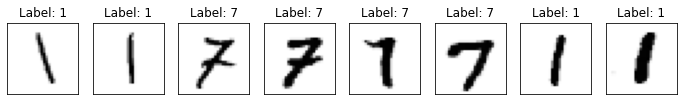

In [37]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader2):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [38]:
from time import time

In [39]:
# Optimization, binary cross-entropy loss (Log loss, aka logistic loss or cross-entropy loss)
# defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true

# compare with: subtraction, MSE, abs


def target_to_sigmoid(target):
    new_target = torch.zeros_like(target)
    new_target[target == class1] = 1
    return new_target


# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 4
learning_rate = 0.01

for epoch in range(num_epochs):

    cost = 0
    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    for image, target in train_loader2:

        image = image.view(num_pixels, 1)
        target = target_to_sigmoid(target)

        prediction = sigmoid(linear(weights, bias, image))

        loss = target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction)
        cost -= loss

        dz = prediction - target
        weights_derivatives += image * dz
        bias_derivative += dz.squeeze()

    weights_derivatives /= len(train_loader2)
    bias_derivative /= len(train_loader2)

    weights -= learning_rate * weights_derivatives
    bias -= learning_rate * bias_derivative

    print(
        f"{epoch+1:>2}/{num_epochs}, Cost={cost[0][0]:0.1f}, Time={time()-start:0.1f}s"
    )

 1/4, Cost=8749.4, Time=6.1s
 2/4, Cost=6710.5, Time=6.1s
 3/4, Cost=5452.5, Time=6.0s
 4/4, Cost=4623.7, Time=6.0s


In [40]:
# Set the batch size to be equal to the size of the training dataset
train_loader2All = torch.utils.data.DataLoader(
    train_dataset,
    sampler=torch.utils.data.SubsetRandomSampler(idxs),
    batch_size=train_size,
)

In [41]:
# Vectorize (operate on all images at once)

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 4
learning_rate = 0.01

for epoch in range(num_epochs):

    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    images, targets = next(iter(train_loader2All))
    # print(len(images), images.shape, images.view(train_size, num_pixels))

    images = images.view(train_size, num_pixels)
    targets = target_to_sigmoid(targets)

    predictions = sigmoid(linear(weights, bias, images.T))
    # print(predictions.shape, targets.shape)

    loss = targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions)
    cost = -loss.sum()

    dZ = predictions - targets
    weights_derivatives = (1 / train_size) * (dZ @ images)
    bias_derivative = (1 / train_size) * dZ.sum()

    weights -= learning_rate * weights_derivatives.T
    bias -= learning_rate * bias_derivative

    print(f"{epoch+1:>2}/{num_epochs}, Cost={cost:0.1f}, Time={time()-start:0.1f}s")

 1/4, Cost=9174.1, Time=2.6s
 2/4, Cost=6830.9, Time=2.5s
 3/4, Cost=5467.8, Time=2.6s
 4/4, Cost=4597.7, Time=2.5s


In [42]:
# Create the validation dataset

valid_dataset = torchvision.datasets.MNIST(
    root=data_path, train=False, download=True, transform=mnist_transforms
)

idx1 = [i for i, t in enumerate(valid_dataset.targets) if t == class1]
idx2 = [i for i, t in enumerate(valid_dataset.targets) if t == class2]

valid_idxs = idx1 + idx2
valid_size = len(valid_idxs)

print(valid_size)

valid_loader2All = torch.utils.data.DataLoader(
    valid_dataset,
    sampler=torch.utils.data.SubsetRandomSampler(valid_idxs),
    batch_size=valid_size,
)

2163


In [43]:
# Add validation metric

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 4
learning_rate = 0.01

# Validate with accuracy
valid_images, valid_targets = next(iter(valid_loader2All))
valid_images = valid_images.view(valid_size, num_pixels)
valid_targets = target_to_sigmoid(valid_targets)

valid_predictions = sigmoid(linear(weights, bias, valid_images.T))

accuracy = 1 - (torch.round(valid_predictions) - valid_targets).abs().sum() / valid_size

print(f"Accuracy={accuracy:.2f}")

for epoch in range(num_epochs):

    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    images, targets = next(iter(train_loader2All))
    images = images.view(train_size, num_pixels)
    targets = target_to_sigmoid(targets)

    predictions = sigmoid(linear(weights, bias, images.T))

    loss = targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions)
    cost = -loss.sum()

    dZ = predictions - targets
    weights_derivatives = (1 / train_size) * (dZ @ images)
    bias_derivative = (1 / train_size) * dZ.sum()

    weights -= learning_rate * weights_derivatives.T
    bias -= learning_rate * bias_derivative

    # Validate with accuracy
    valid_images, valid_targets = next(iter(valid_loader2All))
    valid_images = valid_images.view(valid_size, num_pixels)
    valid_targets = target_to_sigmoid(valid_targets)

    valid_predictions = sigmoid(linear(weights, bias, valid_images.T))

    accuracy = (
        1 - (torch.round(valid_predictions) - valid_targets).abs().sum() / valid_size
    )

    print(
        f"{epoch+1:>2}/{num_epochs}, Cost={cost:0.1f}, Accuracy={accuracy:.2f}, Time={time()-start:0.1f}s"
    )

Accuracy=0.32
 1/4, Cost=9393.6, Accuracy=0.93, Time=2.9s
 2/4, Cost=7080.2, Accuracy=0.95, Time=2.9s
 3/4, Cost=5676.3, Accuracy=0.96, Time=3.0s
 4/4, Cost=4769.3, Accuracy=0.96, Time=3.0s


In [44]:
valid_predictions.shape

torch.Size([1, 2163])

In [45]:
valid_targets.shape

torch.Size([2163])

In [46]:
valid_predictions[:10]

tensor([[0.8085, 0.7109, 0.7800,  ..., 0.2045, 0.5176, 0.2988]])

In [47]:
torch.round(valid_predictions)

tensor([[1., 1., 1.,  ..., 0., 1., 0.]])

In [48]:
(torch.round(valid_predictions) - valid_targets).sum()

tensor(-78.)

In [49]:
(torch.round(valid_predictions) - valid_targets).sum()/valid_size

tensor(-0.0361)

In [50]:
1 - (torch.round(valid_predictions) - valid_targets).sum()/valid_size

tensor(1.0361)

In [51]:
x = 1 - (torch.round(valid_predictions) - valid_targets).sum()/valid_size

In [52]:
f"Accuracy={x:.2f}"

'Accuracy=1.04'